In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [21]:
dataset = pd.read_csv("dataset_4.csv", index_col = 0)
dataset

,text,label
0,Horse face hoe stop playing before I show the...,1
1,Alex Brosas another idiot,1
2,as Nancy Reagan would say just say FUCKING ...,1
3,Not being homophobic here but uhhhhhhhhhh...,1
4,The Nazi death gas so horrific even Hitler fe...,0
...,...,...
99794,Throat Slammed Slut Gets Her Ass Fucked https:...,1
99795,RT @TheCristianoGuy: This is everything. Isco ...,1
99796,RT @spoiledbabbby: ion wish a heartbreak on an...,0
99797,MY DAD JUST APRIL FOOLED ME BY SAYING BTS WAS ...,1


In [22]:
def feature_extract(text, stop_word=True, n_gram=(1, 1)):

    # If stop words want to be excluded.
    if stop_word:
    
        tf_idf = TfidfVectorizer(ngram_range=n_gram, stop_words="english")
        tf_idf.fit_transform(text)

        X = tf_idf.transform(text)
        
    # If stop words want to be included
    if not stop_word:
    
        tf_idf = TfidfVectorizer(ngram_range=n_gram)
        tf_idf.fit_transform(text)

        X = tf_idf.transform(text)
        
    return X

In [23]:
def draw_plot(range_list, value_list, title_str, x_label_str, y_label_str):

    plt.plot(range_list, value_list, color="b", linestyle="dashed", marker="o", markerfacecolor="r")
    plt.title(title_str)
    plt.xlabel(x_label_str)
    plt.ylabel(y_label_str)
    plt.show()

In [24]:
X = dataset['text'].values.astype('U')
temp_y = dataset["label"].values.astype('U')
X = feature_extract(X)
y = []
for label in temp_y:
    if label == "1":
        y.append(1)
    else:
        y.append(0)

In [25]:
c_acc_list = []
for c in range(1, 20):
    clf = LogisticRegression(C=c, solver="liblinear", multi_class="ovr", random_state=42)
    scores = cross_val_score(clf, X, y, cv=10)
    c_acc_list.append(scores.mean())
    print("Accuracy C:", c, ": ", scores.mean())

Accuracy C: 1 :  0.7859050194316929
Accuracy C: 2 :  0.7825719464648672
Accuracy C: 3 :  0.7787334488242071
Accuracy C: 4 :  0.7766123838397877
Accuracy C: 5 :  0.7736159432275553
Accuracy C: 6 :  0.7717977838766775
Accuracy C: 7 :  0.7708550455004644
Accuracy C: 8 :  0.7699797378929291
Accuracy C: 9 :  0.7689023647136193
Accuracy C: 10 :  0.7678250368811613
Accuracy C: 11 :  0.7668823891986519
Accuracy C: 12 :  0.7654682929710453
Accuracy C: 13 :  0.7645930533837878
Accuracy C: 14 :  0.7642563983557685
Accuracy C: 15 :  0.7636839283614971
Accuracy C: 16 :  0.7632127065506589
Accuracy C: 17 :  0.7626067365695944
Accuracy C: 18 :  0.761529295370007
Accuracy C: 19 :  0.7610915735459618


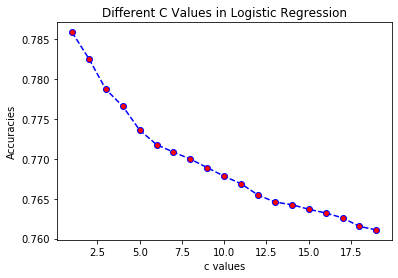

In [27]:
draw_plot(range(1, 20), c_acc_list, "Different C Values in Logistic Regression", "c values", "Accuracies")

In [28]:
c_val = max(c_acc_list)
c = c_acc_list.index(c_val)+1
print(c)

1


In [30]:
with_stop_word_acc = []
without_stop_word_acc = []
for i in range(1, 6):
    for stop_word in [True, False]:
        X = dataset['text'].values.astype('U')
        temp_y = dataset["label"].values.astype('U')
        X = feature_extract(X, stop_word=stop_word, n_gram=(i, i))
        y = []
        for label in temp_y:
            if label == "1":
                y.append(1)
            else:
                y.append(0)

        clf = LogisticRegression(C=c, solver="liblinear", multi_class="ovr", random_state=42)
        scores = cross_val_score(clf, X, y, cv=10)
        if stop_word:
            print("Accuracy without stopwords", (i, i), ":" , scores.mean())
            without_stop_word_acc.append(scores.mean())
        else:
            print("Accuracy with stopwords", (i, i), ":" , scores.mean())
            with_stop_word_acc.append(scores.mean())

Accuracy without stopwords (1, 1) : 0.7859050194316929
Accuracy with stopwords (1, 1) : 0.7840201321883404
Accuracy without stopwords (2, 2) : 0.732604998651498
Accuracy with stopwords (2, 2) : 0.7481623244977638
Accuracy without stopwords (3, 3) : 0.6696718781158247
Accuracy with stopwords (3, 3) : 0.6845592722465137
Accuracy without stopwords (4, 4) : 0.6642844227102022
Accuracy with stopwords (4, 4) : 0.6715949814185607
Accuracy without stopwords (5, 5) : 0.6608164882060207
Accuracy with stopwords (5, 5) : 0.666776096177952
